# Sambhav Agrawal 19264 Data Science and Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
import sklearn.metrics as metrics


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

seed = 42
np.random.seed(seed)

In [2]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.shape

(517, 13)

In [4]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df.describe(include="O")

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [8]:
df.month.value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [9]:
df.day.value_counts()


sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

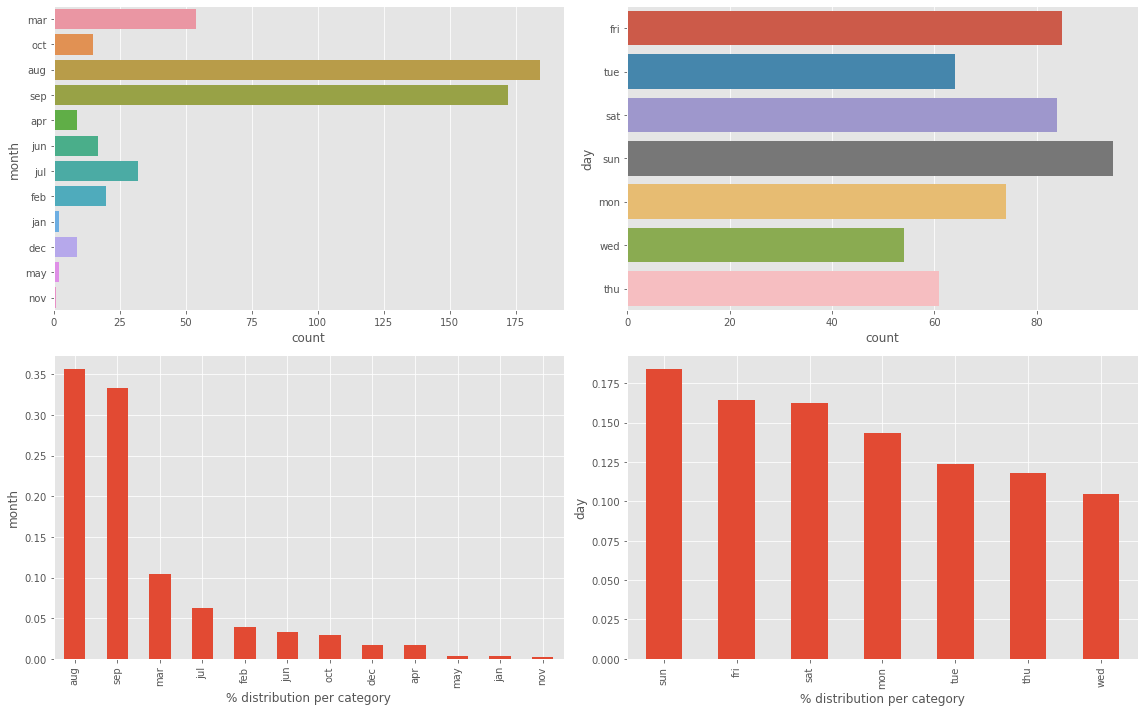

In [10]:
dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data = dfa,y = col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 

As per the above plots, we can observe that most of the forest fires occur in months of August and September.
In the case of days, Sunday, Friday , Saturday and Monday  have higher proportion of cases. (It points to some kind of human actiities during the weekends.)

<AxesSubplot:xlabel='X', ylabel='Y'>

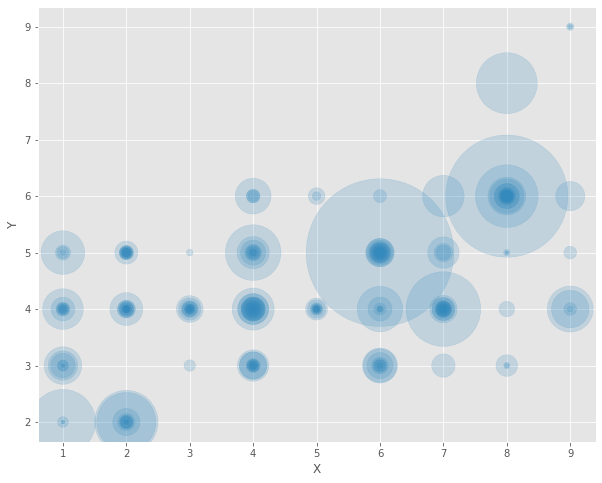

In [11]:
df.plot(kind='scatter', x='X', y='Y',figsize=(10,8), alpha=0.2, s=20*df['area']) 

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


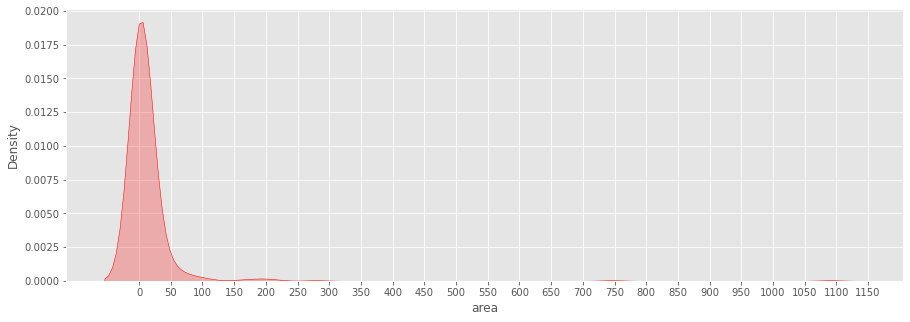

In [12]:
plt.figure(figsize=(15,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='red')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Our data is highly skewed with skew value of 12.85 and a very large kurtosis value of 194.
Majority of forest fires don't cover a large area and most of the burnt area is below 50-60 acres of land.
We could do transformation to fix the skewness and kurtosis value.

C:\Users\Sambhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


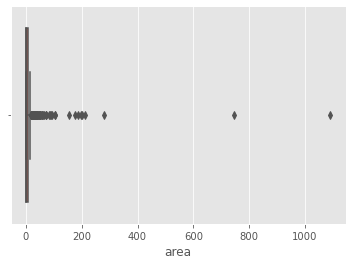

In [13]:
ax = sns.boxplot(df['area'])


In [14]:
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


Extreme values of SKewness and Kurtosis can be observed in FFMC, ISI and rain.

In [15]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


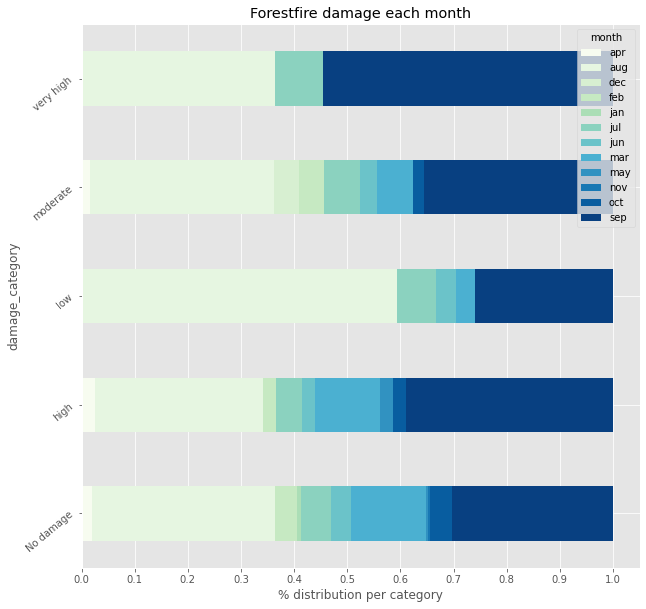

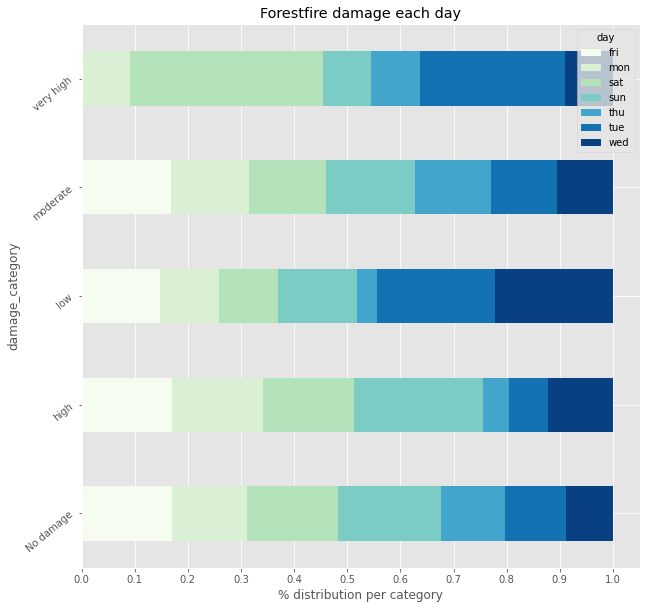

In [16]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='GnBu', figsize = (10,10))
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

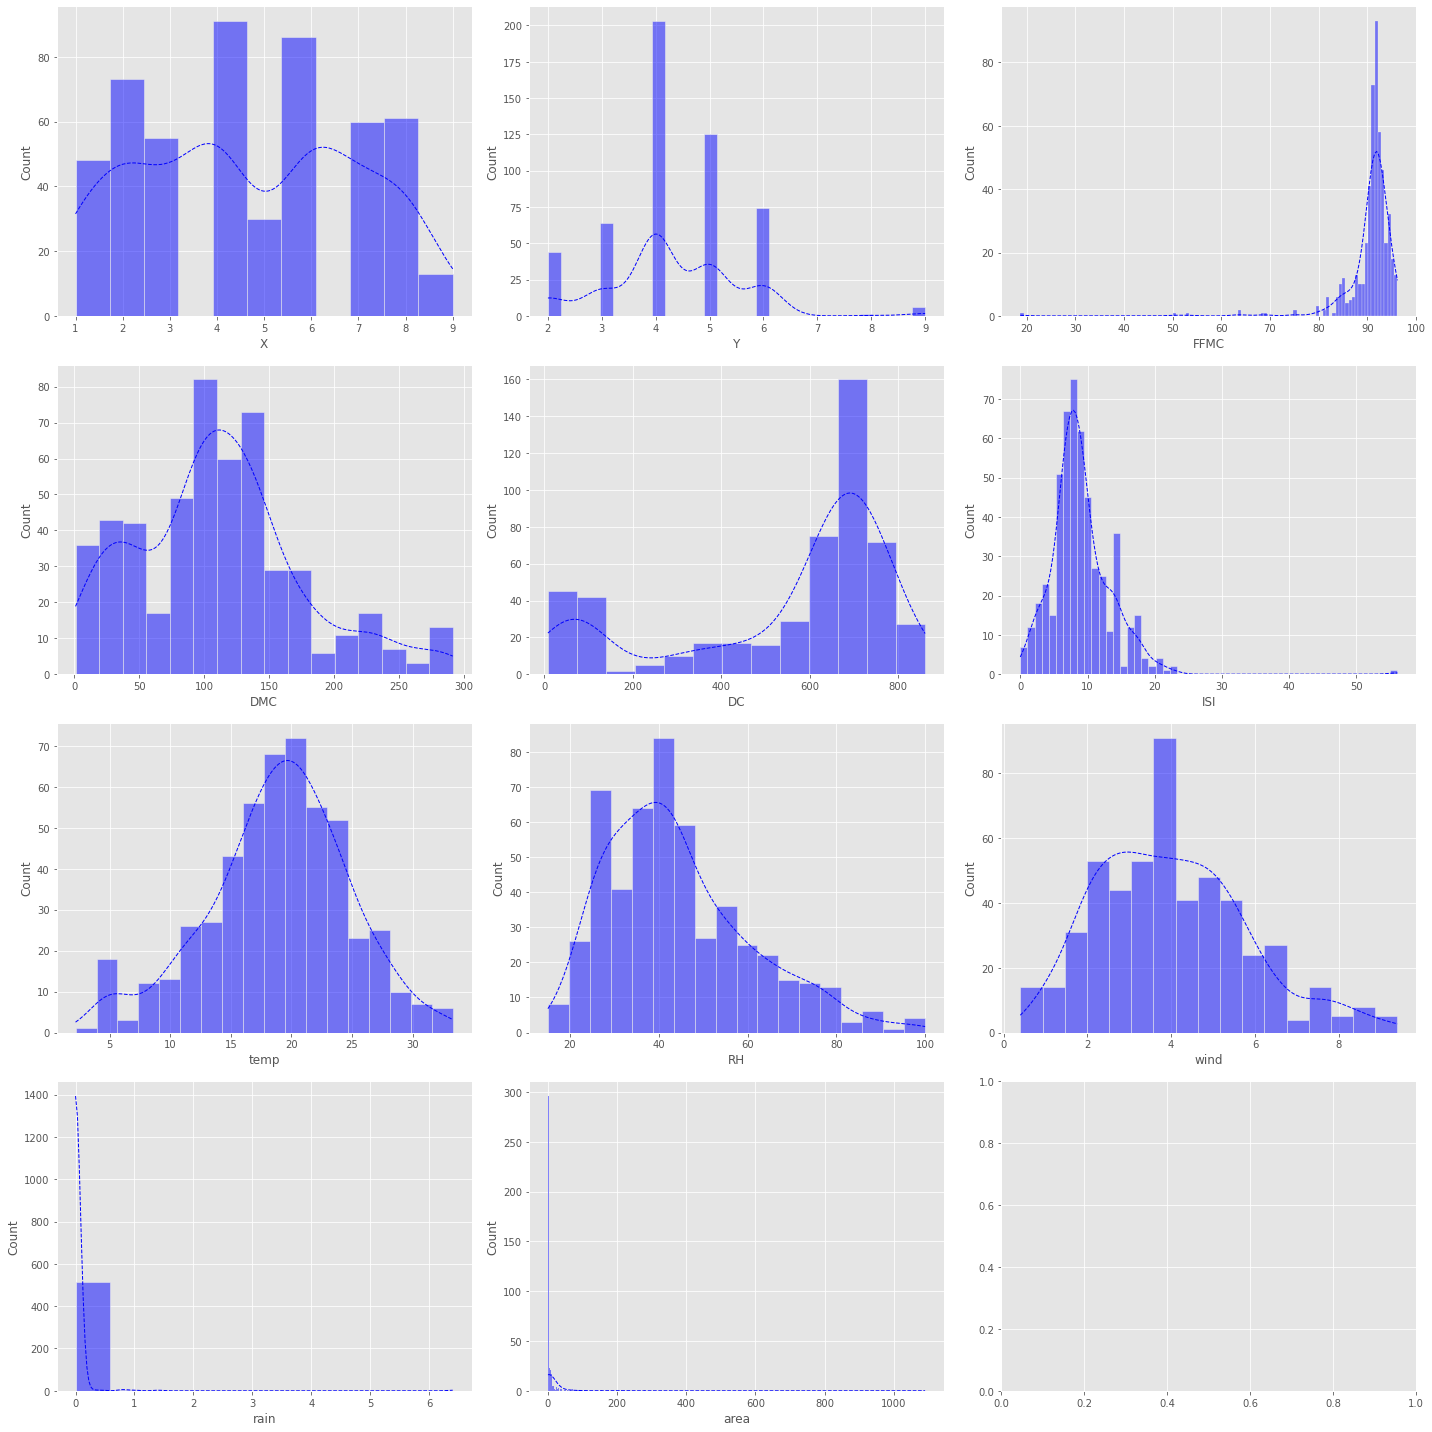

In [17]:
num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=4, ncols=3, figsize=(20,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[0:11]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':1, 'linestyle':'--'}, color='blue')
    
plt.tight_layout()
plt.show()

In [18]:
print("Statistical Description:", df.describe())


Statistical Description:                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791

# Correlation Matrix

In [19]:
print("Correlation:", df.corr(method='pearson'))


Correlation:              X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X  

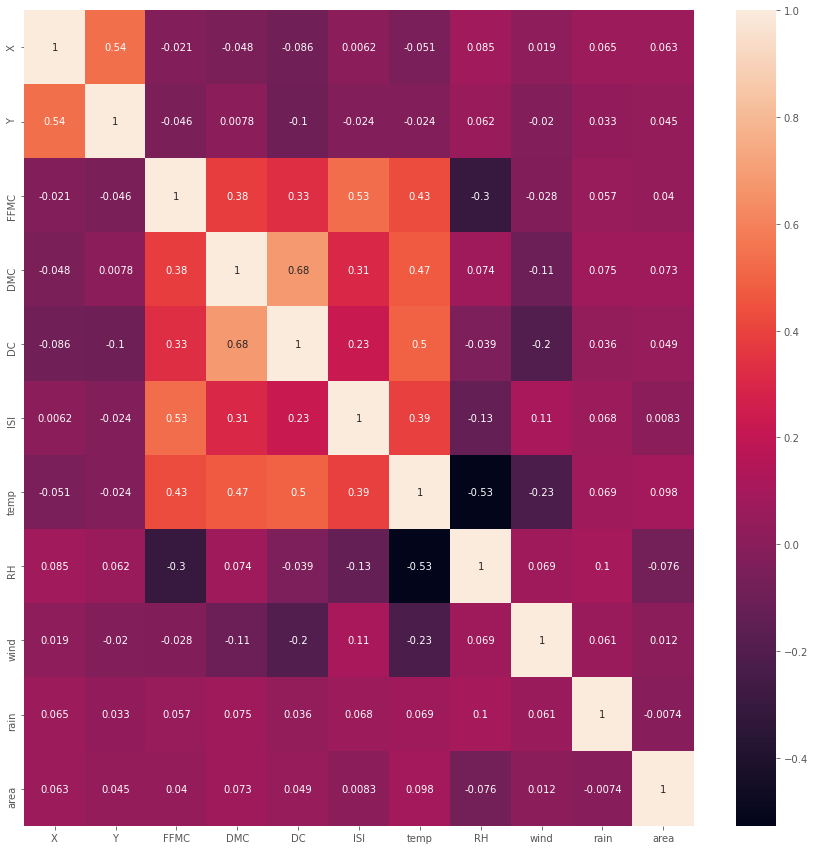

In [20]:
plt.subplots(figsize=(15,15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

As we can see from the above correlation matrix that temp has the highest correlation with the area of the forest fire (positive correlation) along with RH also having positive correlation whereas Rain has the least correlation with the area of forest fire.

array([[<AxesSubplot:xlabel='FFMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='FFMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DC', ylabel='DMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='DMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DC'>,
        <AxesSubplot:xlabel='DC', ylabel='DC'>,
        <AxesSubplot:xlabel='ISI', ylabel='DC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='ISI'>,
        <AxesSubplot:xlabel='DMC', ylabel='ISI'>,
        <AxesSubplot:xlabel='DC', ylabel='ISI'>,
        <AxesSubplot:xlabel='ISI', ylabel='ISI'>]], dtype=object)

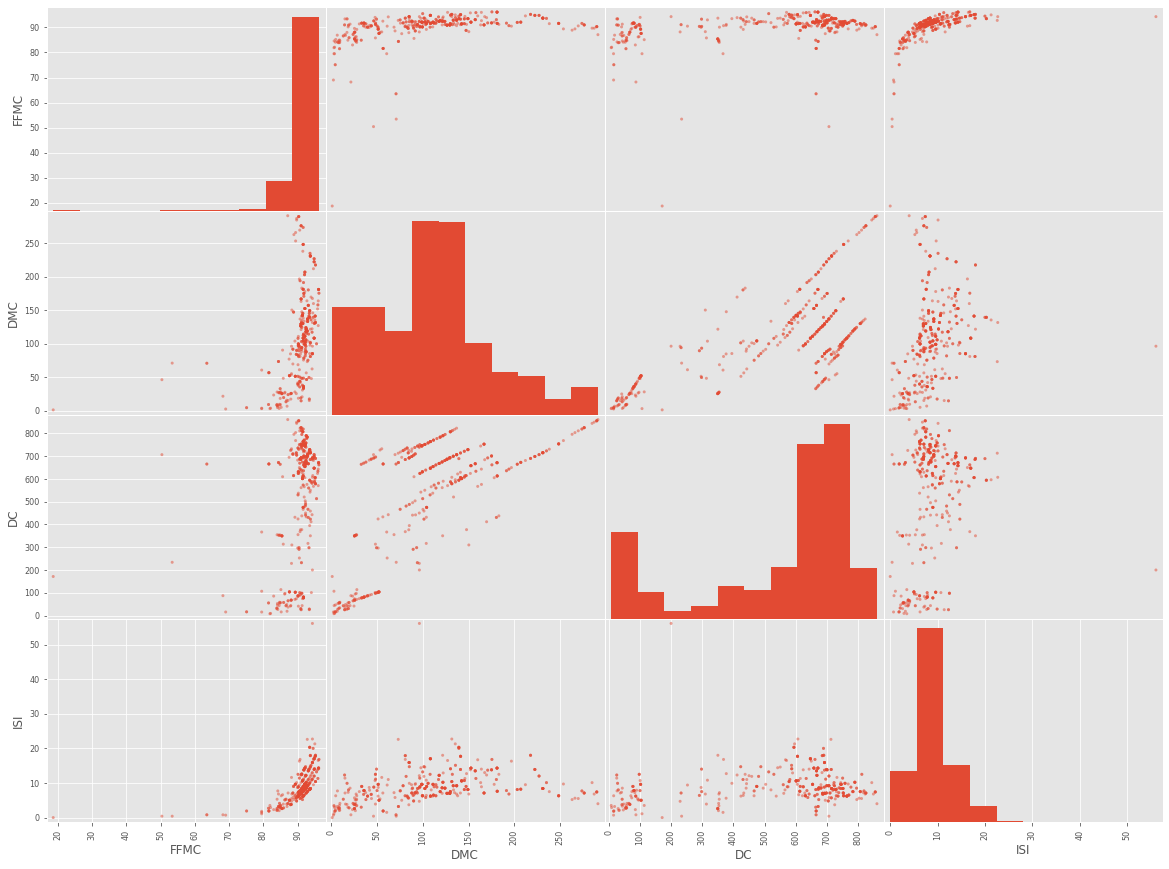

In [21]:
from pandas.plotting import scatter_matrix

attributes = ['FFMC', 'DMC', 'DC', 'ISI']
scatter_matrix(df[attributes], figsize=(20, 15))

<AxesSubplot:xlabel='DMC', ylabel='DC'>

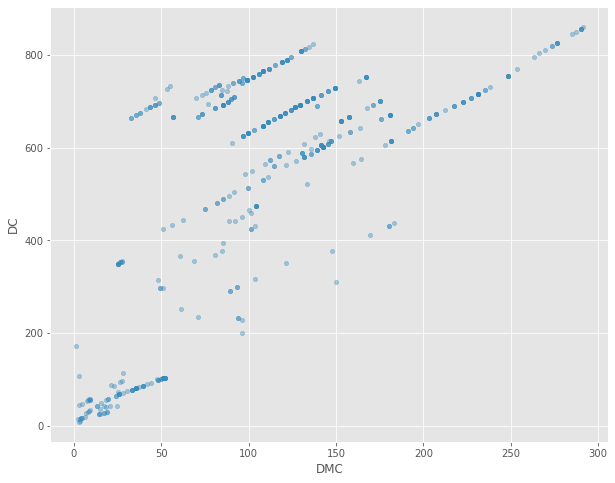

In [22]:
df.plot(kind="scatter", x="DMC", y="DC", alpha=0.4, figsize=(10,8))


# Encoding the data of Days and Months (Data Mapping of Categorical features)

In [23]:
month_map = {'jan':1, 'feb':2, 'mar':3, 
             'apr':4, 'may':5, 'jun':6, 
             'jul':7, 'aug':8, 'sep':9, 
             'oct':10, 'nov':11, 'dec':12}

day_map = {'mon':1, 'tue':2, 'wed':3,
          'thu':4, 'fri':5, 'sat':6, 'sun':7}

df.month = df.month.map(month_map)
df.day = df.day.map(day_map)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                517 non-null    int64  
 1   Y                517 non-null    int64  
 2   month            517 non-null    int64  
 3   day              517 non-null    int64  
 4   FFMC             517 non-null    float64
 5   DMC              517 non-null    float64
 6   DC               517 non-null    float64
 7   ISI              517 non-null    float64
 8   temp             517 non-null    float64
 9   RH               517 non-null    int64  
 10  wind             517 non-null    float64
 11  rain             517 non-null    float64
 12  area             517 non-null    float64
 13  damage_category  517 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 56.7+ KB


In [25]:
df = df.drop(columns=['damage_category']).copy()

# Preparing Train-Test Dataset

In [26]:
X, y = df.drop('area', 1).values, df['area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Models

In [29]:
def model_results(model, X_train, y_train):
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    
    residuals = y_train - predictions
    
    plt.scatter(np.arange(len(residuals)), residuals)
    plt.title("Residual Plot")
    plt.show()

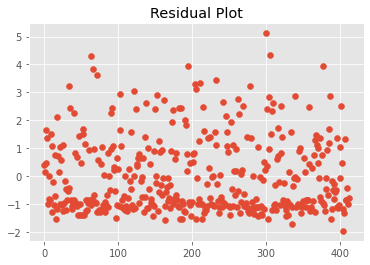

In [30]:
linear_reg = LinearRegression()

model_results(linear_reg, X_train_scaled, y_train_log)

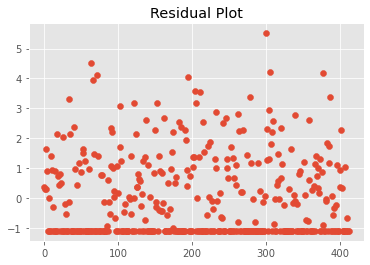

In [31]:
lasso = Lasso(alpha=0.2, random_state=42)

model_results(lasso, X_train_scaled, y_train_log)

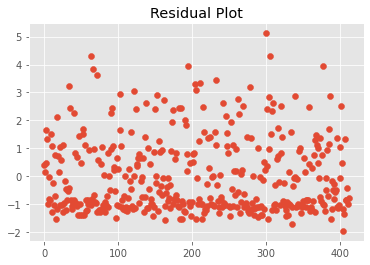

In [32]:
ridge = Ridge(alpha=0.2, random_state=42)

model_results(ridge, X_train_scaled, y_train_log)

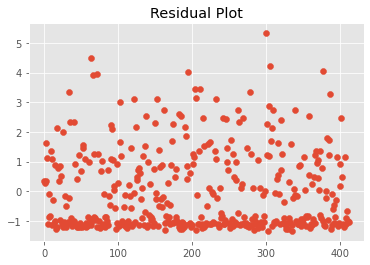

In [33]:
elastic_net = ElasticNet(alpha=0.1)
model_results(elastic_net, X_train_scaled, y_train_log)

In [34]:
def train_test_error(model, X_train=X_train_scaled, 
                     X_test=X_test_scaled, y_train=y_train_log, 
                     y_test=y_test_log):
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
    r2_Score = metrics.r2_score(y_test, model.predict(X_test))
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print('RMSE:', rmse)
    print('R2 Score', r2_Score)
    print('MAE: ', mae)
    


In [35]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(X_train_scaled, y_train_log)
train_test_error(lreg)


RMSE: 1.4672811720036176
R2 Score 0.02045057580570142
MAE:  1.1624955004864979


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit( X_train_scaled, y_train_log)
train_test_error(reg)

RMSE: 1.5784262734625623
R2 Score -0.1335697989483331
MAE:  1.2256717485270945


In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train_scaled, y_train_log)
train_test_error(regressor)

RMSE: 2.0739596459204095
R2 Score -0.9570425484909901
MAE:  1.4981487064842527


DecisionTreeRegressor is having R2 square value closest to 1 hence it is performing good. Also RMSE value is also less.

In [38]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train_scaled, y_train_log)
train_test_error(regr)

RMSE: 1.5900023372248588
R2 Score -0.15025780700305713
MAE:  1.1165195445464737


In [39]:
svr_reg = SVR(kernel='rbf', degree=2, C=1)
svr_reg.fit(X_train_scaled, y_train_log)

train_test_error(svr_reg)

RMSE: 1.592499884974053
R2 Score -0.15387425462724957
MAE:  1.0941117380647147


In [40]:
forest = RandomForestRegressor(n_estimators=10, random_state=101)
forest.fit(X_train_scaled, y_train_log)

train_test_error(forest)

RMSE: 1.6097358872870045
R2 Score -0.17898672934816684
MAE:  1.2357463772687785


# RFE for feature selection

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

**Elastic Net**

In [41]:
rfe = RFE(elastic_net, n_features_to_select=5, verbose=1)
rfe.fit(X_train_scaled,y_train_log)

indexes = np.where(rfe.support_==True)[0]


elastic_net.fit(X_train_scaled[:, indexes.tolist()], y_train_log)

train_test_error(elastic_net, X_train=X_train_scaled[:, indexes.tolist()], 
                 X_test=X_test_scaled[:, indexes.tolist()])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
RMSE: 1.4773776645018493
R2 Score 0.0069234609838233485
MAE:  1.1947076312694511


**Random Forest**

In [42]:

rfe = RFE(forest, n_features_to_select=5, verbose=1)
rfe.fit(X_train_scaled,y_train_log)

indexes = np.where(rfe.support_==True)[0]

forest.fit(X_train_scaled[:, indexes.tolist()], y_train_log)

train_test_error(forest, X_train=X_train_scaled[:, indexes.tolist()], 
                 X_test=X_test_scaled[:, indexes.tolist()])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
RMSE: 1.5762519839212252
R2 Score -0.13044895456604544
MAE:  1.2647422482512418


**Random Forest Regressor along with Cross Validation**

In [43]:
from sklearn import model_selection
forest = RandomForestRegressor(n_estimators = 10)
cv = model_selection.KFold(n_splits = 4)
forest.fit(X_train_scaled, y_train_log)

train_test_error(forest)

RMSE: 1.585797587108035
R2 Score -0.14418215361775988
MAE:  1.2224245096426196


##### 